<a href="https://colab.research.google.com/github/sekarwulanr/rockpaperscissors/blob/main/Submission_Dicoding_161020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dicoding Machine Learning Submission
Image Classifier for Rock-Paper-Scissors


In [ ]:
#setup
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-16 08:31:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.95MB/s    in 52s     

2020-10-16 08:31:58 (5.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = base_dir
validation_dir = base_dir

In [ ]:
os.listdir(base_dir)

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    validation_split = 0.4,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    subset = 'training')
validation_datagen = ImageDataGenerator(
    rescale = 1./255, 
    validation_split=0.4
)

validation_generator = validation_datagen.flow_from_directory(train_dir,
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              target_size=(150,150),
                                                              subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu',input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.000003)

In [ ]:
history = model.fit( 
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2,
      callbacks=[learning_rate_reduction])

Epoch 1/20
25/25 - 50s - loss: 1.1600 - accuracy: 0.5275 - val_loss: 1.0033 - val_accuracy: 0.5312
Epoch 2/20
25/25 - 48s - loss: 0.3170 - accuracy: 0.8844 - val_loss: 0.8982 - val_accuracy: 0.6125
Epoch 3/20
25/25 - 48s - loss: 0.1752 - accuracy: 0.9416 - val_loss: 0.8181 - val_accuracy: 0.6938
Epoch 4/20
25/25 - 48s - loss: 0.1144 - accuracy: 0.9675 - val_loss: 0.5510 - val_accuracy: 0.8562
Epoch 5/20
25/25 - 48s - loss: 0.1210 - accuracy: 0.9584 - val_loss: 0.6988 - val_accuracy: 0.7875
Epoch 6/20
25/25 - 48s - loss: 0.1285 - accuracy: 0.9649 - val_loss: 0.4672 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 48s - loss: 0.0987 - accuracy: 0.9714 - val_loss: 0.3647 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 48s - loss: 0.0514 - accuracy: 0.9805 - val_loss: 0.2336 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 48s - loss: 0.0794 - accuracy: 0.9805 - val_loss: 0.2725 - val_accuracy: 0.9500
Epoch 10/20

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
25/25 - 48s - lo

Saving 1S76OKU9PW_1.jpg to 1S76OKU9PW_1.jpg
1S76OKU9PW_1.jpg
paper


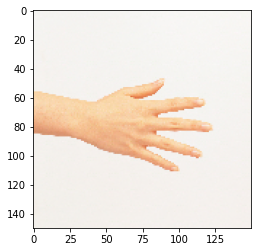

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

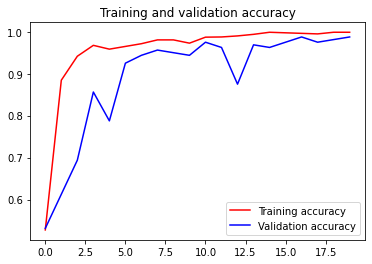

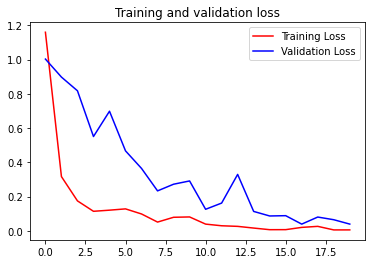

In [ ]:
#visualisasi accuracy dan loss
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()